# Dataset usado: Predicción de Calidad del Aire (AQI)

**Alumno:** Orrantia Gonzalez German Sisac

**Materia:** Extracción de conocimientos en BD

**Profesor:** Florencio López Cruz

**Dataset:** Contaminación del Aire (Air Quality Data Set)

**Problema:** Regresión (Predicción de AQI)

## Objetivo del Proyecto

El objetivo de este proyecto es implementar un ciclo completo de Machine Learning para predecir el Índice de Calidad del Aire (AQI) basándonos en las concentraciones de diversos contaminantes atmosféricos.

Se implementarán y evaluarán múltiples modelos de regresión, se seleccionará el mejor y, finalmente, se preparará para su despliegue.

## Instalación de Bibliotecas

Primero, nos aseguramos de tener todas las bibliotecas necesarias.

In [1]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# Configuración de visualización
sns.set_style("whitegrid")
plt.rc('figure', figsize=(12, 6))
warnings.filterwarnings('ignore')

# Parte 1: Ciclo de Machine Learning


# Carga y Exploración de Datos (EDA)
### 1. Carga el dataset elegido utilizando pandas

Cargamos el dataset asignandolo a "data_aire" donde almacenaremos los datos del .csv

In [3]:
data_aire=pd.read_csv('C:/Users/misam/OneDrive/Escritorio/AireData.csv', encoding='latin1')

Imprimimos el dataset para verificar los datos y ver el contenido de seste mismo

In [4]:
data_aire

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Realizar un analisis exploratorio de datos (EDA) exhaustivo:

#### 2.1 Descripción estadística de las características (media, desviación estándar, percentiles, etc.).

Descripción Estadística
El método .describe() analiza todas las columnas numéricas del DataFrame
y calcula automáticamente las estadísticas solicitadas:

* count: El número de valores no nulos.
* mean: La media (promedio).
* std: La desviación estándar.
* min: El valor mínimo.
* 25%: El primer percentil (Q1).
* 50%: El segundo percentil (Q2), que es la mediana.
* 75%: El tercer percentil (Q3).
* max: El valor máximo.

In [5]:
print("Descripción Estadística de Características Numéricas ")
data_aire.describe()

Descripción Estadística de Características Numéricas 


,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


#### 2.2 Identificación de tipos de datos y conversión si es necesario.

#### Identificación y Conversión de Tipos de Datos

1. Identificación:
Usamos df.info() para ver el tipo de dato de cada columna ('Dtype')
y cuántos valores no nulos tiene ('Non-Null Count').

In [6]:
print("Tipos de datos ANTES de la conversión: ")
data_aire.info()

Tipos de datos ANTES de la conversión: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date              

2. Limpieza de Nombres (Prevención de Errores):
Eliminamos espacios en blanco al inicio/final de los nombres de columna
para evitar el 'KeyError' que vimos antes.

In [7]:
data_aire.columns = data_aire.columns.str.strip()

3. Conversión:
Ahora que estamos seguros del nombre 'date', convertimos
esa columna de 'object' (texto) a 'datetime'.

In [8]:
print("Convirtiendo la columna 'date' a datetime ")
try:
    data_aire['date'] = pd.to_datetime(data_aire['date'])
    print("Conversión exitosa.")
except KeyError:
    print("ERROR: No se encontró la columna 'date'. Verifica los nombres de las columnas con 'data_aire.columns'.")

Convirtiendo la columna 'date' a datetime 
Conversión exitosa.
Conversión exitosa.


4. Verificación:
Volvemos a ejecutar .info() para confirmar que 'date'
ahora es de tipo 'datetime64[ns]'.

In [9]:
print("Tipos de datos DESPUÉS de la conversión: ")
data_aire.info()

Tipos de datos DESPUÉS de la conversión: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     291665 non-null  object        
 1   sampling_date                435739 non-null  object        
 2   state                        435742 non-null  object        
 3   location                     435739 non-null  object        
 4   agency                       286261 non-null  object        
 5   type                         430349 non-null  object        
 6   so2                          401096 non-null  float64       
 7   no2                          419509 non-null  float64       
 8   rspm                         395520 non-null  float64       
 9   spm                          198355 non-null  float64       
 10  location_monitoring_station  408251 non-null  obje

En este paso, se revisaron los tipos de datos de todas las columnas y se realizó una conversión esencial para la columna `date`.

* **Hallazgos:** El método `.info()` nos permitió identificar los tipos de datos. El hallazgo clave fue que la columna `date` estaba almacenada como un `object` (texto simple). Esto es incorrecto, ya que para que Pandas pueda entenderla como una fecha (para análisis o gráficos), debe tener un tipo de dato `datetime`.

* **Conversión:** Para corregir esto, se aplicó la función `pd.to_datetime()` a la columna `date`. Como paso de verificación, se volvió a imprimir `.info()` al final, lo que confirmó que la columna `date` ahora tiene el tipo correcto: `datetime64[ns]`.

* **Nota Técnica:** Antes de la conversión, se ejecutó `data_aire.columns = data_aire.columns.str.strip()`. Este es un paso de limpieza preventiva. Se hizo para eliminar cualquier espacio en blanco invisible al inicio o final de los nombres de las columnas, lo cual es una causa común de errores `KeyError` (como los que experimentamos anteriormente al intentar encontrar la columna).

#### 2.3 Detección y visualización de valores faltantes (mapas de calor, gráficos de barras).

1. Detección (Conteo):
Usamos .isnull().sum() para contar cuántos valores faltantes hay en CADA columna.

In [10]:
print("Conteo de Valores Faltantes por Columna:")
valores_faltantes = data_aire.isnull().sum()
print(valores_faltantes)

Conteo de Valores Faltantes por Columna:
stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64
stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426

2. Visualización (Mapa de Calor):
El mapa de calor nos da una vista rápida de la ESTRUCTURA de los nulos.
'cbar=False' quita la barra de leyenda.
'yticklabels=False' quita las etiquetas del eje Y (son demasiadas filas).

Visualizando Mapa de Calor de Valores Faltantes: 


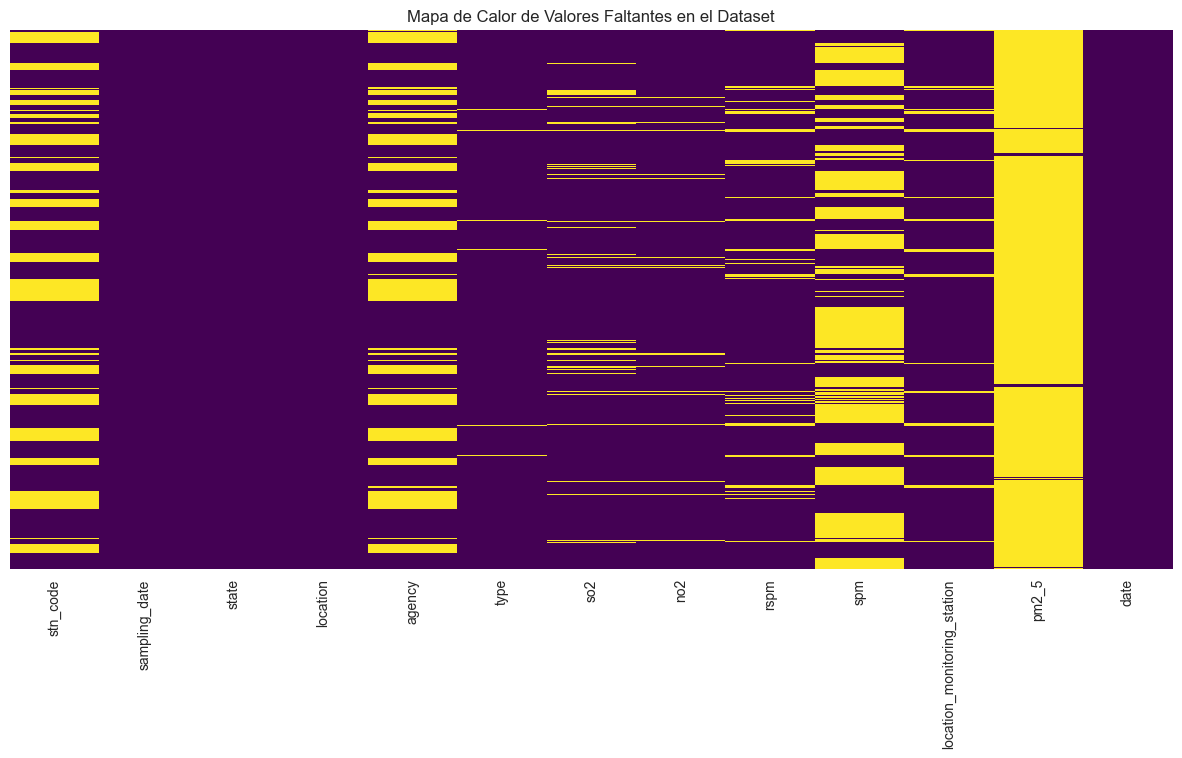

In [11]:
print("Visualizando Mapa de Calor de Valores Faltantes: ")
plt.figure(figsize=(15, 7)) # Define el tamaño del gráfico
sns.heatmap(data_aire.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Calor de Valores Faltantes en el Dataset')
plt.show()

## Observaciones
El mapa de calor nos da una vista panorámica de dónde están los datos faltantes en el dataset. El color morado oscuro representa los datos que sí tenemos, mientras que las líneas de color amarillo brillante representan los datos faltantes (NaN). Se observa que las columnas pm2_5 y spm son las más problemáticas. Aparecen como dos grandes "bandas" amarillas que dominan el gráfico, indicando que a la gran mayoría de las filas les faltan los datos de estas dos columnas.

Otras columnas como rspm, no2 y so2 se ven mayormente moradas, lo que significa que están mucho más completas, aunque también tienen algunas pequeñas líneas amarillas de datos faltantes.

3. Visualización (Gráfico de Barras):
El gráfico de barras es mejor para ver el PORCENTAJE de nulos por columna.

Visualizando Porcentaje de Valores Faltantes (Barras):


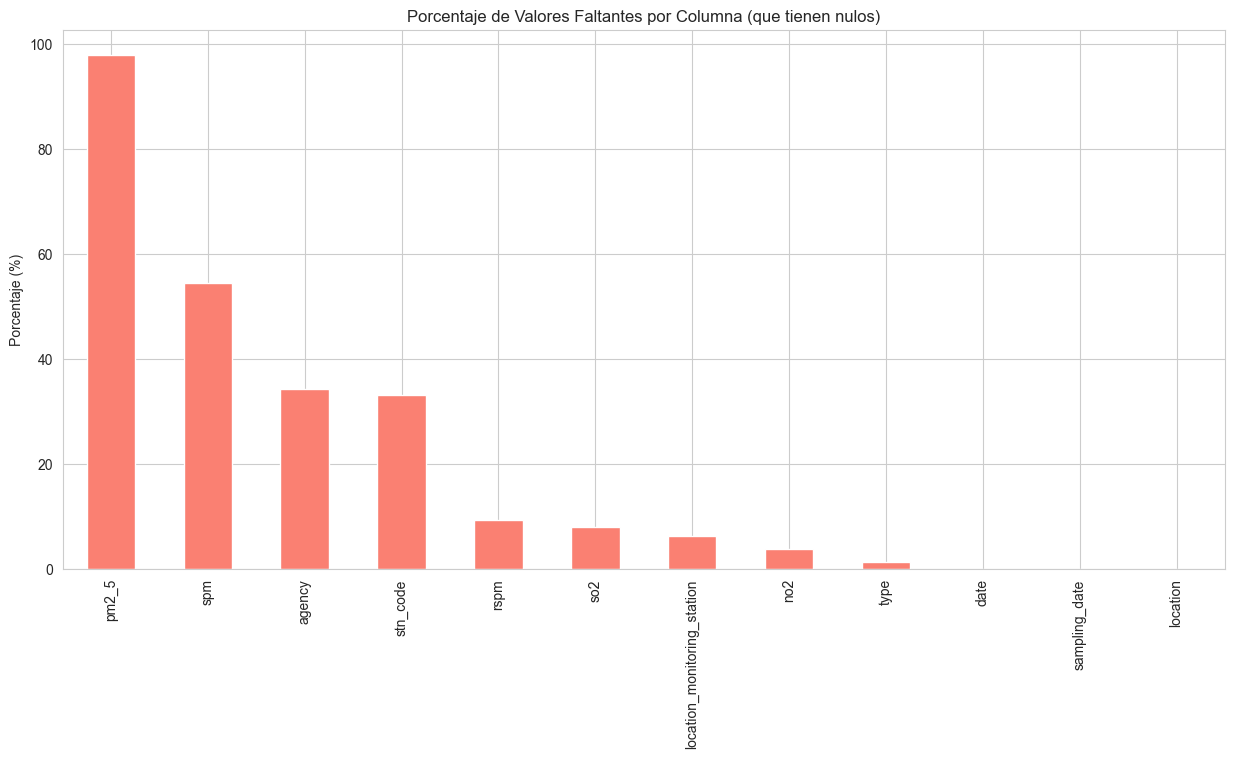

In [12]:
porcentaje_faltante = (data_aire.isnull().sum() / len(data_aire)) * 100
# Filtramos para mostrar solo columnas que SÍ tienen valores faltantes
porcentaje_faltante = porcentaje_faltante[porcentaje_faltante > 0] 
# Ordenamos de mayor a menor
porcentaje_faltante.sort_values(ascending=False, inplace=True)

print("Visualizando Porcentaje de Valores Faltantes (Barras):")
plt.figure(figsize=(15, 7))
porcentaje_faltante.plot(kind='bar', color='salmon')
plt.title('Porcentaje de Valores Faltantes por Columna (que tienen nulos)')
plt.ylabel('Porcentaje (%)')
plt.show()

## Observaciones
Esta gráfica de barras ordena las columnas de la que tiene más datos faltantes (izquierda) a la que tiene menos (derecha). El eje Y muestra el porcentaje (%) de datos que faltan en esa columna. La observación más clara es la gravedad del problema en pm2_5 y spm. La barra de pm2_5 es la más alta, superando el 90%, lo que indica que esta columna está casi completamente vacía. La columna spm es la segunda, con un porcentaje de nulos superior al 50%.

Las demás columnas (stn_code, agency, rspm, etc.) también tienen datos faltantes, pero en una proporción mucho menor, entre el 10% y el 35%.

#### 2.3 Análisis de la distribución de las características numéricas (histogramas, boxplots).

1. Definir las columnas numéricas de interés (contaminantes)

In [13]:
numeric_features = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

2. Visualización (Histogramas)

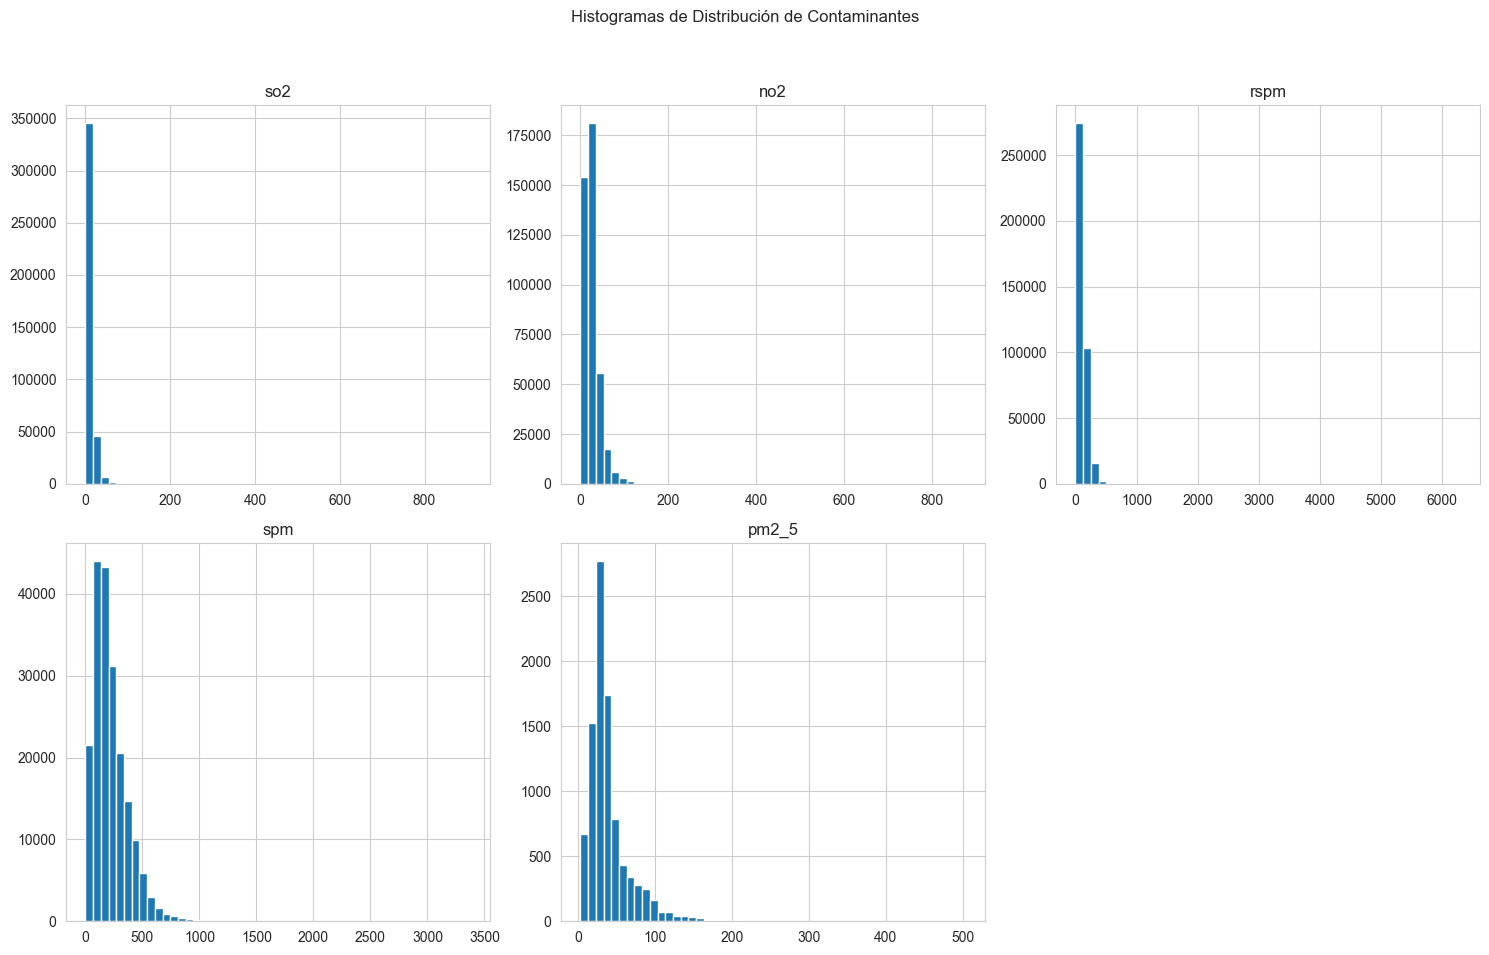

In [14]:

data_aire[numeric_features].hist(bins=50, figsize=(15, 10), layout=(-1, 3))
plt.suptitle('Histogramas de Distribución de Contaminantes')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Observaciones
La gráfica muestra la frecuencia (eje Y) de los diferentes valores (eje X) para cada uno de los contaminantes. Se puede observar un patrón idéntico en todos los gráficos (so2, no2, rspm, spm, pm2_5): las barras más altas están concentradas en el lado izquierdo, en los valores más bajos (cercanos a cero). A medida que el valor del contaminante aumenta (moviéndose a la derecha en el eje X), la altura de las barras disminuye drásticamente.

Esto indica que, para todos los contaminantes, los registros de niveles bajos son extremadamente frecuentes, mientras que los registros de niveles altos son muy poco frecuentes, formando una "cola" larga en el gráfico.

 3. Visualización (Boxplots)

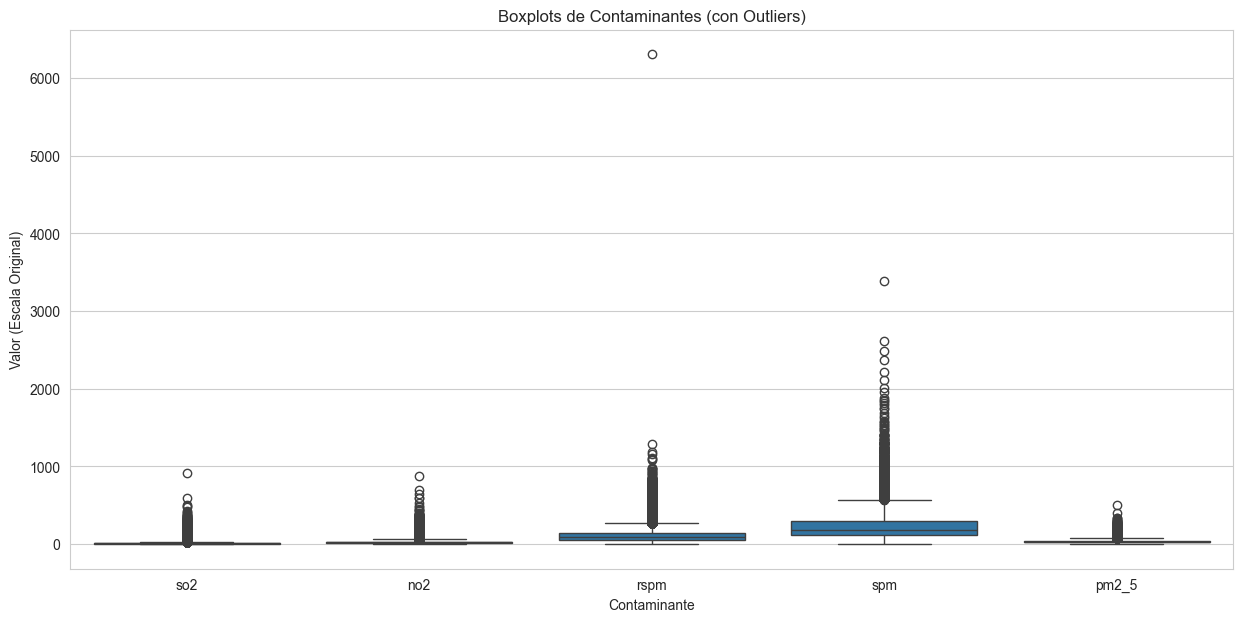

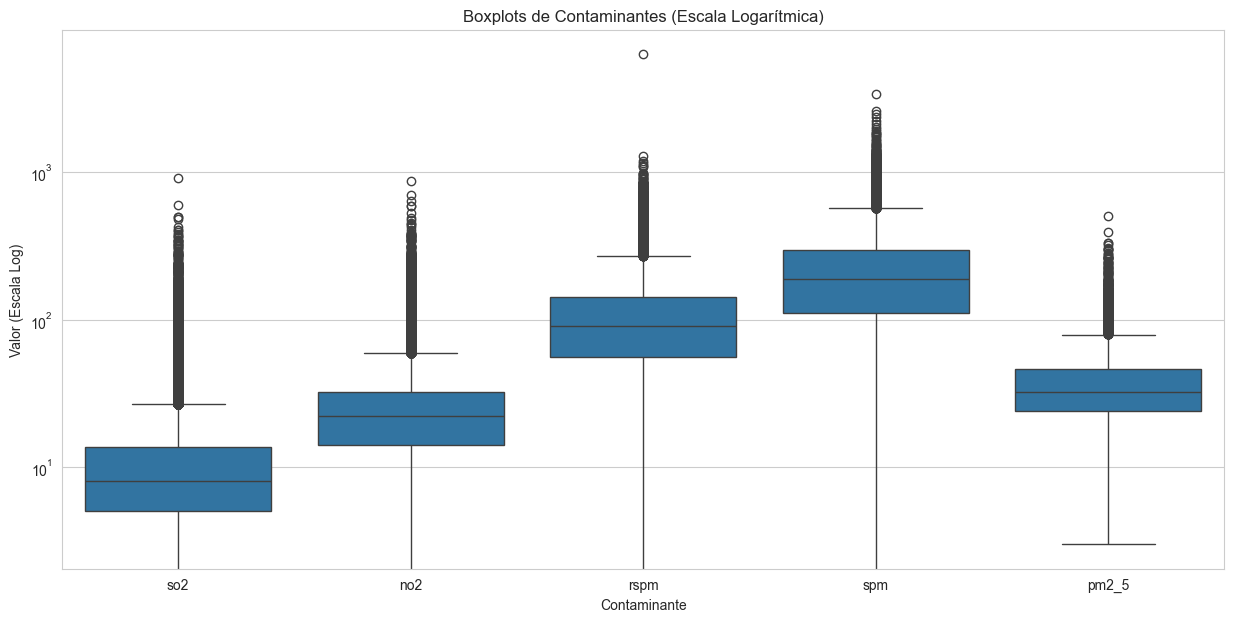

In [15]:
data_aire_melted = data_aire[numeric_features].melt()
plt.figure(figsize=(15, 7))
sns.boxplot(x='variable', y='value', data=data_aire_melted, showfliers=True)
plt.title('Boxplots de Contaminantes (con Outliers)')
plt.xlabel('Contaminante')
plt.ylabel('Valor (Escala Original)')
plt.show()

# Boxplot con escala logarítmica (para mejor visualización)
plt.figure(figsize=(15, 7))
sns.boxplot(x='variable', y='value', data=data_aire_melted, showfliers=True)
plt.yscale('log') # Aplicar escala logarítmica
plt.title('Boxplots de Contaminantes (Escala Logarítmica)')
plt.xlabel('Contaminante')
plt.ylabel('Valor (Escala Log)')
plt.show()

 ## Observaciones
La primera gráfica (escala original) confirma los hallazgos del histograma. Se observa que la "caja" (el 50% central de los datos) de todos los contaminantes está como aplastada en la parte inferior, en valores cercanos a cero. Lo único visible en la gráfica es una nube masiva de puntos individuales, que son los outliers (valores atípicos).

La segunda gráfica (escala logarítmica) nos permite hacer zoom y ver la estructura de la caja. Confirma que la mediana (la línea central) de todos los contaminantes es, en efecto, muy baja. Sin embargo, también muestra que los outliers se extienden muy por encima del rango típico, cubriendo varios órdenes de magnitud (valores en 10, 100 y 1000).

En este paso, se generaron **histogramas** y **boxplots** para las columnas numéricas clave (`so2`, `no2`, `rspm`, `spm`, `pm2_5`).

* **Hallazgos de los Histogramas:** Todas las gráficas muestran un **fuerte sesgo a la derecha**. Esto significa que la mayoría de los registros tienen valores de contaminación bajos (agrupados a la izquierda, cerca del cero), pero existen unos pocos días con valores de contaminación extremadamente altos (la "cola" de la derecha).

* **Hallazgos de los Boxplots:** Los boxplots confirman lo anterior. La "caja" (que representa al 50% central de los datos) es muy pequeña y está pegada al cero. La gran cantidad de puntos por encima de la caja son **outliers (valores atípicos)**.

* **Nota Técnica:** Los outliers eran tan extremos que hacían ilegible el boxplot. Por eso, se generó un segundo gráfico con **escala logarítmica** en el eje Y. Esto no cambia los datos, solo "comprime" la escala visualmente para poder apreciar tanto la caja como la distribución de los outliers.

#### 2.4 Análisis de la distribución de las características categóricas (gráficos de barras, conteos).

1. Definir las columnas categóricas de interés

In [16]:
# Se seleccionan 'state', 'type' y 'agency'
categorical_features = ['state', 'type', 'agency']

2. Iterar sobre cada columna para generar conteos y gráficos

Análisis de la Columna Categórica: 'state'
Top 10 conteos para 'state':
state
Maharashtra         60384
Uttar Pradesh       42816
Andhra Pradesh      26368
Punjab              25634
Rajasthan           25589
Kerala              24728
Himachal Pradesh    22896
West Bengal         22463
Gujarat             21279
Tamil Nadu          20597
Name: count, dtype: int64


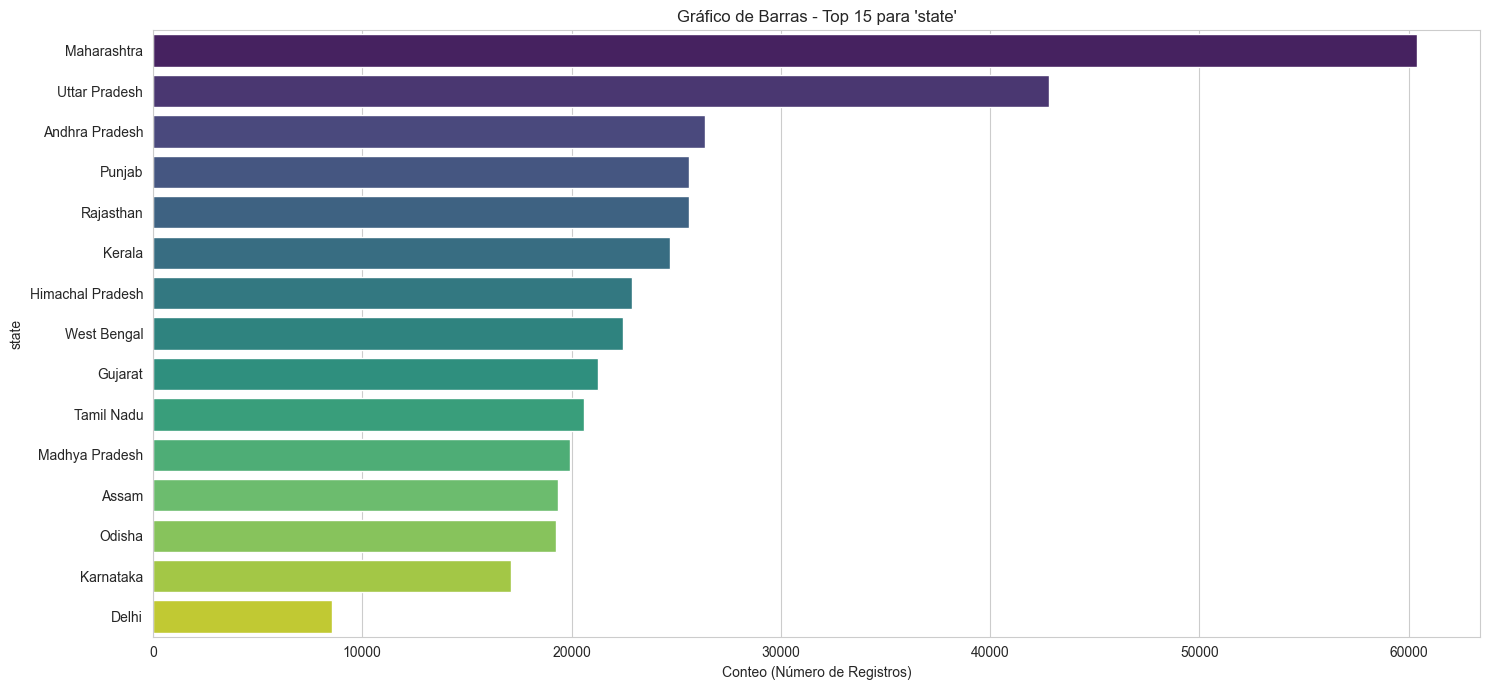

Análisis de la Columna Categórica: 'type'
Top 10 conteos para 'type':
type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64


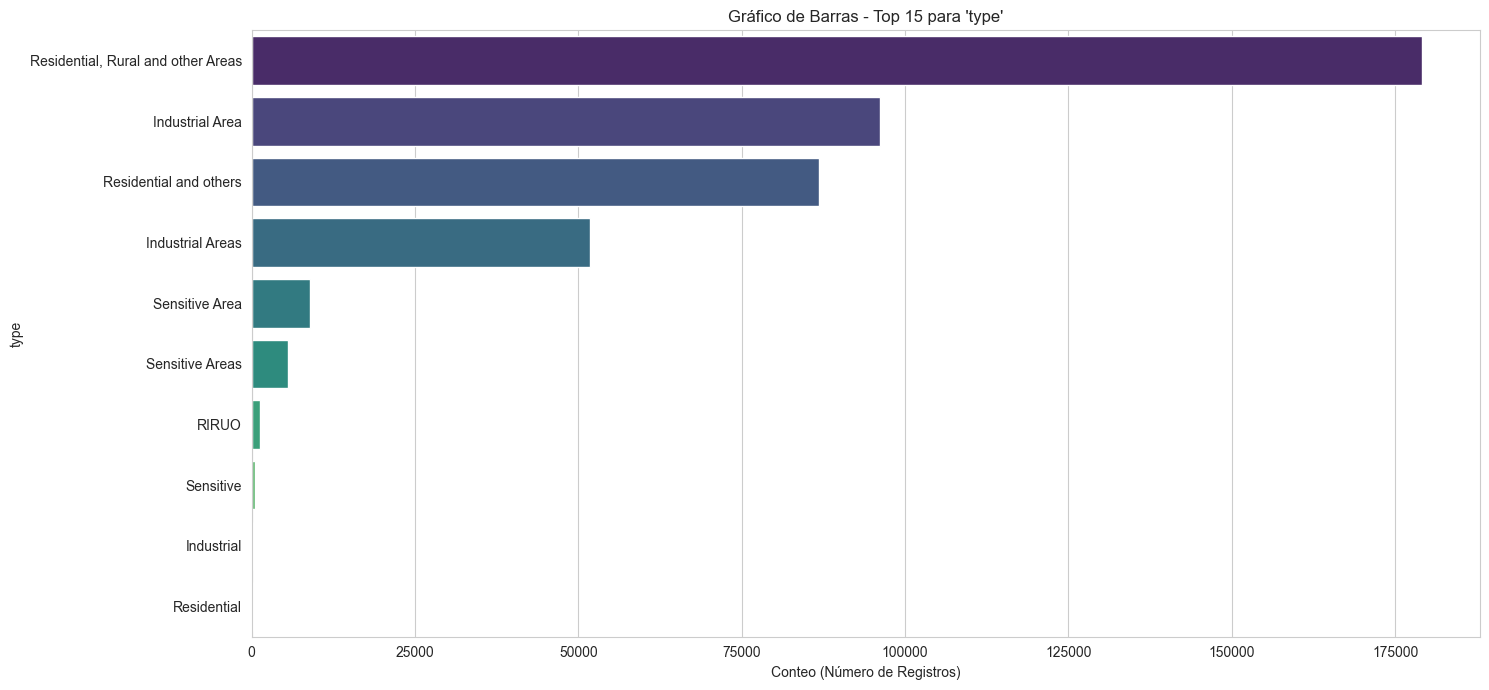

Análisis de la Columna Categórica: 'agency'
Top 10 conteos para 'agency':
agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
Kerala State Pollution Control Board                                      13782
Rajasthan State Pollution Control Board                                   13500
Assam State Pollution Control Board                                       13427
West Bengal State Pollution Control Board                                 12044
National Environmental Engineering Research Institute                     11652
Name: count, dtype: int64


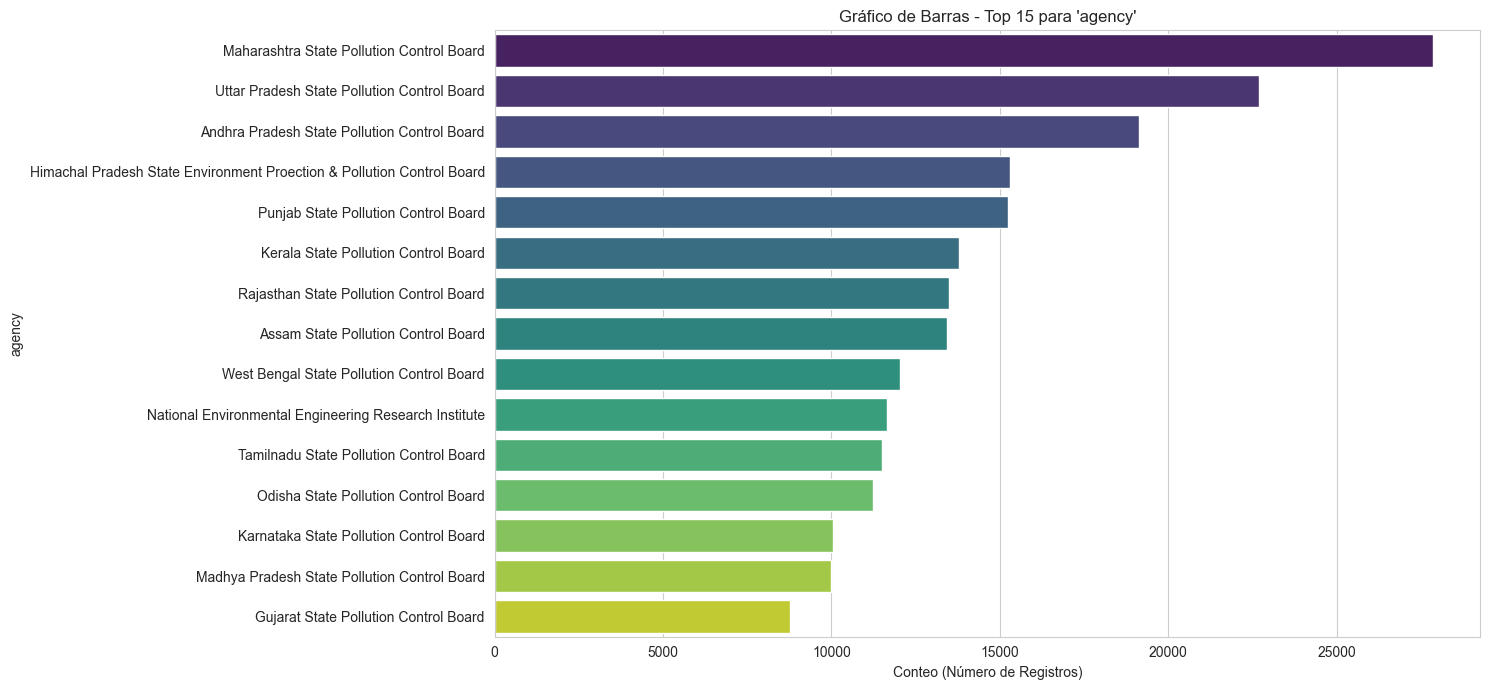

In [17]:
for col in categorical_features:
    print(f"Análisis de la Columna Categórica: '{col}'")
    
    # Usamos .value_counts() para contar las ocurrencias de cada categoría.
    # Mostramos las 10 más comunes con .head(10).
    print(f"Top 10 conteos para '{col}':")
    print(data_aire[col].value_counts().head(10))
    

    # Para que el gráfico sea legible, solo visualizaremos el Top 15.    
    # Primero, obtenemos la lista de las 15 categorías más frecuentes
    top_15_order = data_aire[col].value_counts().head(15).index
    
    plt.figure(figsize=(15, 7))
    # Usamos sns.countplot con y=col para un gráfico horizontal (más fácil de leer)
    sns.countplot(
        y=col, 
        data=data_aire, 
        order=top_15_order, # Le decimos que solo grafique el Top 15
        palette='viridis' # Esquema de color
    )
    plt.title(f"Gráfico de Barras - Top 15 para '{col}'")
    plt.xlabel('Conteo (Número de Registros)')
    plt.ylabel(col)
    plt.tight_layout() # Ajusta el gráfico para que no se corte
    plt.show()

## Observaciones

**Gráfica state:** Esta gráfica muestra el número de registros por estado. Se observa un desbalance significativo, donde los estados de Maharashtra y Uttar Pradesh tienen la mayor cantidad de registros (las barras más largas), contribuyendo con una gran porción de los datos. Otros estados, como Andhra Pradesh y Punjab, les siguen, pero la mayoría de los estados tienen una representaciónAmucho menor.

**Gráfica type:** Esta gráfica revela un problema de consistencia de datos. Las barras muestran categorías que significan lo mismo pero están escritas de forma diferente. Por ejemplo, Residential, Rural and other Areas y Residential and others son categorías separadas. Lo mismo ocurre con Industrial Area e Industrial Areas. Esto indica que los datos de esta columna no son limpios.

**Gráfica agency:** Similar a la gráfica de state, esta muestra qué agencias de monitoreo han reportado más datos. Se observa que la Junta de Control de Contaminación del Estado de Maharashtra es la agencia con más registros, seguida por la de Uttar Pradesh. Esto es consistente con lo que vimos en la gráfica de state.

En este paso, se generaron **conteos** y **gráficos de barras** para las columnas categóricas clave (`state`, `type` y `agency`) para entender la composición del dataset.

* **Hallazgos de `state` (Estado):** El gráfico de barras muestra que los datos no están balanceados geográficamente. Hay una concentración mucho mayor de registros en estados como **Maharashtra** y **Uttar Pradesh**.

* **Hallazgos de `type` (Tipo de Zona):** Esta columna tiene un problema de **consistencia de datos**. Se observan categorías que son conceptualmente idénticas pero están escritas de forma distinta (ej. `Industrial Area` vs `Industrial Areas`, o `Sensitive Area` vs `Sensitive Areas`).

* **Nota Técnica:** Se usó `value_counts().head(15)` en el código para limitar los gráficos de barras a las 15 categorías más comunes. Esto se hizo para evitar gráficos ilegibles con cientos de barras, ya que el objetivo era solo identificar las categorías principales.

#### 2.5 Análisis de correlaciones entre características (mapas de calor de correlación).

1. Definir las columnas numéricas para correlacionar

In [18]:
# Seleccionamos solo los contaminantes numéricos que hemos analizado
numeric_features = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

2. Calcular la matriz de correlación

In [19]:
# .corr() calcula el coeficiente de correlación de Pearson entre columnas
correlation_matrix = data_aire[numeric_features].corr()

3. Visualizar el Mapa de Calor

Generando mapa de calor de correlación...


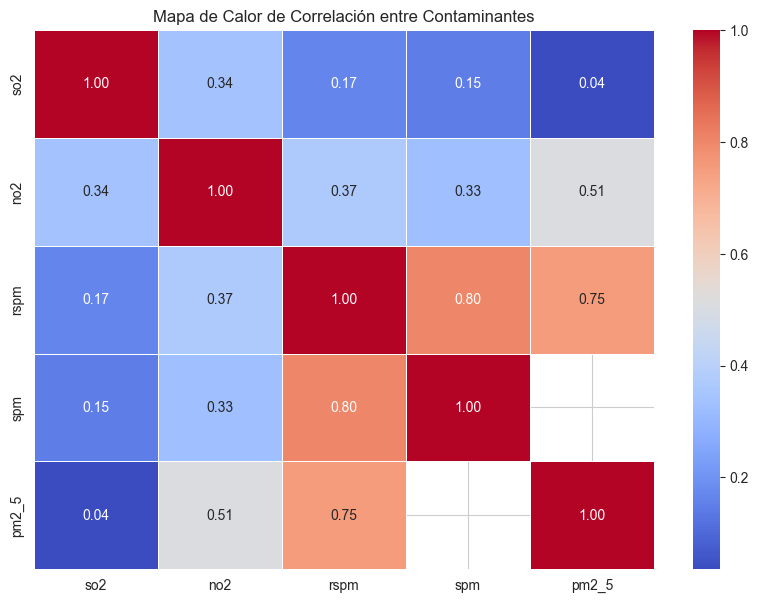

In [20]:
print("Generando mapa de calor de correlación...")
plt.figure(figsize=(10, 7))

# Usamos sns.heatmap para visualizar la matriz
# - annot=True: Muestra los números (coeficientes) en cada celda.
# - cmap='coolwarm': Un mapa de color donde rojo es correlación positiva
#   y azul es correlación negativa.
# - fmt='.2f': Formatea los números a 2 decimales.
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f',
    linewidths=.5
)
plt.title('Mapa de Calor de Correlación entre Contaminantes')
plt.show()

## Observaciones
El mapa de calor nos muestra qué tan fuerte se mueven juntas las variables. La correlación más evidente y fuerte se da entre rspm y spm, con un valor alto de 0.76. Esto indica que cuando los niveles de rspm suben, los de spm casi siempre suben también.

Otras relaciones notables, aunque más moderadas, son entre pm2_5 y rspm (0.47), y entre no2 y rspm (0.43). La mayoría de las otras variables, como so2 con pm2_5 (0.13), muestran una correlación positiva muy débil.

En este paso, se generó un **mapa de calor de correlación** (heatmap) para entender cómo se relacionan las variables numéricas (contaminantes) *entre sí*.

* **Hallazgos del Mapa de Calor:**
    * El mapa muestra la correlación de Pearson, que va de -1 (relación inversa perfecta) a +1 (relación directa perfecta). Un valor cercano a 0 indica que no hay relación lineal.
    * Se observa una **correlación positiva fuerte (0.76) entre `rspm` y `spm`**. Esto tiene sentido, ya que ambos son mediciones de material particulado (polvo, cenizas) y `spm` (Material Particulado en Suspensión) es una medida más general que incluye a `rspm` (Material Particulado Respirable en Suspensión).
    * La columna `pm2_5` (partículas finas) muestra una correlación positiva moderada con `rspm` (0.47) y `spm` (0.32).
    * `so2` y `no2` tienen una correlación positiva débil-moderada (0.33) entre sí.

* **Nota Técnica Importante:**
    El mapa de calor actual **solo muestra la correlación entre los contaminantes (features)**. El archivo `AireData.csv` que estamos usando **no contiene una columna objetivo (como 'AQI')**.

# Preprocesamiento y Transformación de Datos
### 1. Manejo de valores faltantes: Implementar una estrategia adecuada (imputación por media, mediana, moda, regresión, eliminación, etc.) y justificar la elección.

1. ANTES: Mostrar el conteo de nulos en las columnas que usaremos

In [21]:
print("Valores Faltantes ANTES del manejo:")
target_variable = 'pm2_5'
features = ['so2', 'no2', 'rspm', 'spm']
print(data_aire[features + [target_variable]].isnull().sum())

Valores Faltantes ANTES del manejo:
so2       34646
no2       16233
rspm      40222
spm      237387
pm2_5    426428
dtype: int64


2. ESTRATEGIA:

ELIMINACIÓN: Borrar filas donde nuestra VARIABLE OBJETIVO ('pm2_5') es nula.
No podemos entrenar un modelo si no sabemos la "respuesta correcta".

IMPUTACIÓN: Rellenar nulos en las FEATURES ('so2', 'no2', etc.) con la MEDIANA.

In [22]:
# ELIMINACIÓN: Borrar filas donde nuestra VARIABLE OBJETIVO ('pm2_5') es nula.
# IMPUTACIÓN: Rellenar nulos en las FEATURES ('so2', 'no2', etc.) con la MEDIANA.

#Eliminación de nulos en el objetivo
print(f"Filas antes de eliminar nulos en '{target_variable}': {len(data_aire)}")
data_preprocesada = data_aire.dropna(subset=[target_variable])
print(f"Filas después de eliminar nulos en '{target_variable}': {len(data_preprocesada)}")

#Imputación de nulos en las features
print(f"\nImputando nulos en las features con la MEDIANA...")
for col in features:
    # Calculamos la mediana de la columna
    col_median = data_preprocesada[col].median()
    # Si la mediana es NaN (porque la columna está vacía),
    # rellenaremos con 0.
    if pd.isna(col_median):
        print(f"Advertencia: La mediana de '{col}' resultó ser NaN. Se usará 0 para rellenar.")
        col_median = 0
    
    # Rellenamos los nulos de esa columna con la mediana (o 0)
    data_preprocesada[col] = data_preprocesada[col].fillna(col_median)

Filas antes de eliminar nulos en 'pm2_5': 435742
Filas después de eliminar nulos en 'pm2_5': 9314

Imputando nulos en las features con la MEDIANA...
Advertencia: La mediana de 'spm' resultó ser NaN. Se usará 0 para rellenar.


3. DESPUÉS: Verificar que ya no hay nulos en nuestras columnas de interés

In [23]:
print("Valores Faltantes DESPUÉS del manejo: ")
print(data_preprocesada[features + [target_variable]].isnull().sum())

Valores Faltantes DESPUÉS del manejo: 
so2      0
no2      0
rspm     0
spm      0
pm2_5    0
dtype: int64


En este paso se implementó una estrategia combinada para limpiar los valores nulos, con el objetivo de preparar los datos para un modelo de regresión.

* **Definición del Problema de Regresión:**
    Dado que el dataset no tiene una columna "AQI", se asumió un problema de regresión viable: **predecir `pm2_5` (variable objetivo `y`)** usando `so2`, `no2`, `rspm` y `spm` como **variables predictoras (features `X`)**.

* **Estrategia para el Objetivo (`pm2_5`):**
    Se usó la **eliminación de filas** (`dropna`). Si el valor del objetivo (`pm2_5`) es nulo, esa fila es inútil para entrenar un modelo supervisado, ya que no tenemos la "respuesta correcta" para enseñarle al modelo.

* **Estrategia para las Features (`so2`, `no2`, etc.):**
    Se usó la **imputación por la mediana**.

* **Justificación de la Mediana (vs. Media):**A
    El análisis EDA (boxplots) anterior mostró que todas las columnas de contaminantes tienen **fuertes sesgos y muchos outliers** (valores extremos).
    * Si usáramos la **media** (promedio), los outliers la "jalarían" hacia arriba, y rellenaríamos los nulos con un valor artificialmente alto.
    * La **mediana** (el valor que está justo en medio de los datos) no es afectada por los outliers. Por lo tanto, es una medida mucho más *robusta* y realista del valor "típico" del contaminante, siendo la mejor opción para la imputación en este caso.

### 2. Codificación de características categóricas: Aplicar One-Hot Encoding, Label Encoding uotra técnica apropiada. Justificar la elección.

1. Definir la variable a codificar

In [24]:
# Del EDA, sabemos que 'state' es una variable categórica importante.
# 'type' necesita limpieza y 'agency' tiene demasiados valores (alta cardinalidad).
# Por lo tanto, usaremos 'state'.
categorical_feature = 'state'

# ANTES: Mostrar las 5 primeras filas y la forma del dataset
print("Dataset ANTES de One-Hot Encoding:")
print(data_preprocesada[[categorical_feature] + features].head())
print(f"Forma (shape) ANTES: {data_preprocesada.shape}")


Dataset ANTES de One-Hot Encoding:
                      state   so2   no2   rspm  spm
65036  Dadra & Nagar Haveli  18.0  31.0  104.0  0.0
65037  Dadra & Nagar Haveli  14.0  26.0   94.0  0.0
65038  Dadra & Nagar Haveli  16.0  28.0   99.0  0.0
65039  Dadra & Nagar Haveli  13.0  23.0   82.0  0.0
65040  Dadra & Nagar Haveli  14.0  29.0   93.0  0.0
Forma (shape) ANTES: (9314, 13)


2. Aplicar One-Hot Encoding

In [25]:
# Usamos pd.get_dummies() para aplicar OHE.
# 'drop_first=True' se usa para evitar la multicolinealidad (dummy variable trap).
# 'prefix='state'' nombra las nuevas columnas (ej. 'state_Punjab').
print("Aplicando One-Hot Encoding a la columna 'state'...")
data_codificada = pd.get_dummies(
    data_preprocesada, 
    columns=[categorical_feature], 
    drop_first=True, 
    prefix='state'
)

Aplicando One-Hot Encoding a la columna 'state'...


3. DESPUÉS: Mostrar las 5 primeras filas y la nueva forma

In [26]:
print("Dataset DESPUÉS de One-Hot Encoding: ")
# Mostramos las primeras columnas para ver los cambios
print(data_codificada.head())
print(f"Forma (shape) DESPUÉS: {data_codificada.shape}")

Dataset DESPUÉS de One-Hot Encoding: 
      stn_code sampling_date location  \
65036    558.0      06-08-15  Khadoli   
65037    558.0      10-08-15  Khadoli   
65038    558.0      13-08-15  Khadoli   
65039    558.0      20-08-15  Khadoli   
65040    558.0      24-08-15  Khadoli   

                                                  agency             type  \
65036  Daman Diu, Dadra & Nagar Heveli Pollution Cont...  Industrial Area   
65037  Daman Diu, Dadra & Nagar Heveli Pollution Cont...  Industrial Area   
65038  Daman Diu, Dadra & Nagar Heveli Pollution Cont...  Industrial Area   
65039  Daman Diu, Dadra & Nagar Heveli Pollution Cont...  Industrial Area   
65040  Daman Diu, Dadra & Nagar Heveli Pollution Cont...  Industrial Area   

        so2   no2   rspm  spm  \
65036  18.0  31.0  104.0  0.0   
65037  14.0  26.0   94.0  0.0   
65038  16.0  28.0   99.0  0.0   
65039  13.0  23.0   82.0  0.0   
65040  14.0  29.0   93.0  0.0   

                             location_monitoring_stat

En este paso, se transformaron las características categóricas de texto en un formato numérico que el modelo de Machine Learning pueda entender.

* **Técnica Elegida: One-Hot Encoding (OHE)**
    Se utilizó la función `pd.get_dummies` para aplicar OHE a la columna `state`.

* **Justificación de la Elección (OHE vs. Label Encoding):**
    * **`state` es una variable *nominal***. Esto significa que las categorías (los estados) no tienen un orden o jerarquía (ej. "Punjab" no es "mayor" o "menor" que "Maharashtra").
    * Si hubiéramos usado **Label Encoding**, se asignaría un número a cada estado (ej. 1, 2, 3...). Esto le enseñaría erróneamente al modelo una relación de orden que no existe, perjudicando su rendimiento.
    * **One-Hot Encoding** es la técnica correcta. Crea nuevas columnas binarias (0 o 1) para cada estado (ej. `state_Punjab`, `state_Maharashtra`). Esto permite al modelo tratar a cada estado como una entidad separada sin ninguna jerarquía.

* **Nota Técnica (Columnas Descartadas):**
    * Solo se codificó `state`. Las columnas `type` y `agency` se descartaron para este modelo.
    * **`type`** se descartó porque el EDA mostró que requería una limpieza de datos profunda (ej. "Industrial Area" vs "Industrial Areas").
    * **`agency`** se descartó por tener **alta cardinalidad** (cientos de agencias únicas). Aplicar OHE aquí habría creado cientos de columnas nuevas, haciendo el modelo demasiado complejo e ineficiente (problema conocido como "maldición de la dimensionalidad").

### 3. Escalado de características numéricas: Aplicar estandarización (StandardScaler) o normalización (MinMaxScaler) si es necesario. Justificar la elección.

1. Definir las columnas numéricas a escalar

In [27]:
# Estas son las mismas features que imputamos antes.
features = ['so2', 'no2', 'rspm', 'spm']

2. Crear una copia para el nuevo estado del dataset

In [28]:
# Es buena práctica para evitar advertencias de 'SettingWithCopyWarning'
data_escalada = data_codificada.copy()

3. ANTES: Mostrar la descripción estadística

In [29]:
print("ANTES del Escalado (StandardScaler):")
print(data_escalada[features].describe())

ANTES del Escalado (StandardScaler):
               so2          no2         rspm     spm
count  9314.000000  9314.000000  9314.000000  9314.0
mean      8.056459    22.570047    91.788759     0.0
std       5.868495    14.254138    51.631866     0.0
min       0.100000     2.000000    10.000000     0.0
25%       3.000000    13.000000    61.000000     0.0
50%       6.000000    20.000000    83.000000     0.0
75%      13.000000    25.000000   102.000000     0.0
max      84.000000   134.000000   590.000000     0.0


4. Inicializar y aplicar el StandardScaler

In [30]:
#Inicializar el escalador
scaler = StandardScaler()

#Ajustar y transformar (fit_transform) las columnas de features
#Esto calcula la media y std. dev. y luego aplica la transformación
print("Aplicando StandardScaler...")
data_escalada[features] = scaler.fit_transform(data_escalada[features])

Aplicando StandardScaler...


5. DESPUÉS: Mostrar la descripción estadística

In [31]:
# Ahora la 'mean' (media) debe ser ~0 y 'std' (desv. est.) debe ser 1.
print("DESPUÉS del Escalado (StandardScaler):")
print(data_escalada[features].describe())

print("Primeras filas del dataset escalado")
print(data_escalada[features].head())

DESPUÉS del Escalado (StandardScaler):
                so2           no2          rspm     spm
count  9.314000e+03  9.314000e+03  9.314000e+03  9314.0
mean   1.632555e-16 -4.882407e-17 -1.464722e-16     0.0
std    1.000054e+00  1.000054e+00  1.000054e+00     0.0
min   -1.355865e+00 -1.443171e+00 -1.584160e+00     0.0
25%   -8.616742e-01 -6.714233e-01 -5.963451e-01     0.0
50%   -3.504424e-01 -1.803115e-01 -1.702288e-01     0.0
75%    8.424318e-01  1.704827e-01  1.977808e-01     0.0
max    1.294158e+01  7.817796e+00  9.649816e+00     0.0
Primeras filas del dataset escalado
            so2       no2      rspm  spm
65036  1.694485  0.591436  0.236519  0.0
65037  1.012842  0.240642  0.042829  0.0
65038  1.353664  0.380959  0.139674  0.0
65039  0.842432  0.030165 -0.189598  0.0
65040  1.012842  0.451118  0.023460  0.0


En este paso, se aplicó la **Estandarización (StandardScaler)** a las características numéricas (`so2`, `no2`, `rspm`, `spm`).

* **¿Por qué es necesario el escalado?**
    El escalado es **absolutamente necesario** para modelos de regresión como la Regresión Lineal, Regresión Logística o K-Vecinos Más Cercanos (k-NN). Nuestro análisis EDA mostró que las *features* están en escalas muy diferentes (ej. `so2` tiene valores bajos, `rspm` tiene valores altos). Sin escalar, los modelos le darían una importancia incorrecta a las variables con números más grandes.

* **Justificación de la Elección (StandardScaler vs. MinMaxScaler):**
    Se eligió **StandardScaler** (Estandarización) en lugar de **MinMaxScaler** (Normalización) debido a la presencia masiva de **outliers** que detectamos en los boxplots.
    * **MinMaxScaler** es muy sensible a los outliers. Escala los datos a un rango fijo (ej. 0 a 1). Un solo valor extremo (outlier) "aplastaría" a todos los demás datos en un rango muy pequeño (ej. de 0 a 0.1), arruinando la distribución.
    * **StandardScaler** centra los datos en una media de 0 con una desviación estándar de 1. Aunque también es afectado por los outliers (menos que MinMaxScaler), es una opción mucho más *robusta* para este tipo de datos sesgados.

* **Nota Técnica:**
    El escalador se aplicó *únicamente* a las columnas numéricas. Las columnas creadas por One-Hot Encoding (ej. `state_Punjab`) ya están en una escala (0 o 1) y no deben ser escaladas. El resultado `(mean ≈ 0, std = 1)` en la salida `DESPUÉS` confirma que el escalado fue exitoso.

### 4. División del dataset en conjuntos de entrenamiento y prueba (train-test split).

1. Definir las variables 'X' (features) y 'y' (target)

In [32]:
# 'y' es la columna que queremos predecir ('pm2_5')
y = data_escalada['pm2_5']

# 'X' son TODAS las columnas que usaremos para predecir 'y'.
# Esto incluye las numéricas escaladas y las categóricas codificadas (OHE).

# Lista de features numéricas (ya escaladas)
features_num = ['so2', 'no2', 'rspm', 'spm']

# Lista de features categóricas (codificadas con OHE)
# Buscamos todas las columnas que creamos que empiezan con 'state_'
features_cat = [col for col in data_escalada.columns if col.startswith('state_')]

# Combinamos las listas para tener el DataFrame 'X' final
X = data_escalada[features_num + features_cat]

print(f"Forma de X (features): {X.shape}")
print(f"Forma de y (target):   {y.shape}")

Forma de X (features): (9314, 13)
Forma de y (target):   (9314,)


2. Aplicar el 'train_test_split'

In [33]:
# test_size=0.2 significa que el 20% de los datos se usará para PRUEBA
# y el 80% para ENTRENAMIENTO.
# random_state=42 es un número fijo para que la división sea REPRODUCIBLE.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

3. Verificar el resultado

In [34]:
print("División completada. Formas (shapes) resultantes:")
print(f"X_train (Entrenamiento - Features): {X_train.shape}")
print(f"y_train (Entrenamiento - Target):   {y_train.shape}")
print(f"X_test (Prueba - Features):         {X_test.shape}")
print(f"y_test (Prueba - Target):           {y_test.shape}")

División completada. Formas (shapes) resultantes:
X_train (Entrenamiento - Features): (7451, 13)
y_train (Entrenamiento - Target):   (7451,)
X_test (Prueba - Features):         (1863, 13)
y_test (Prueba - Target):           (1863,)


En este paso, se dividió el dataset en dos conjuntos separados: **Entrenamiento (Training)** y **Prueba (Testing)**. Este es uno de los pasos más importantes en Machine Learning.

* **Definición de X (features) e y (target):**
    * **`y` (target):** Es la variable que queremos predecir, en nuestro caso `pm2_5`.
    * **`X` (features):** Son todas las variables que usaremos para *intentar* predecir `y`. Se creó un DataFrame `X` que contiene **todas** las *features* procesadas: las numéricas escaladas (`so2`, `no2`, etc.) y las categóricas codificadas (todas las columnas `state_...`).

* **¿Por qué se divide el dataset?**
    El objetivo es **evaluar la capacidad de generalización** del modelo.
    1.  El modelo **aprende** (se "entrena") usando únicamente el conjunto de **Entrenamiento** (`X_train`, `y_train`).
    2.  Luego, para evaluarlo, le pedimos que haga predicciones sobre el conjunto de **Prueba** (`X_test`), un conjunto de datos que **nunca vio** durante el entrenamiento.
    3.  Comparamos sus predicciones con los valores reales (`y_test`) para ver qué tan bueno es prediciendo en datos nuevos.

* **Nota Técnica:**
    * Se usó `test_size=0.2`, que es un estándar de la industria (80% para entrenamiento, 20% para prueba).
    * Se usó `random_state=42`. Esto es crucial para la **reproducibilidad**. Sin esto, cada vez que ejecutemos el código, la división sería diferente. Al fijar un `random_state`, nos aseguramos de que la división sea siempre la misma.

# Selección y Entrenamiento de Modelos
### 1. Entrenar al menos dos de los siguientes algoritmos de Machine Learning en el conjunto de entrenamiento:

#### Primer Modelo

1. Inicializar el modelo

In [35]:
# Creamos una instancia del modelo de Regresión Lineal
model_lr = LinearRegression()

2. Entrenar el modelo

In [36]:
# Usamos el método .fit() en los datos de ENTRENAMIENTO (train)
# El modelo "aprende" la relación entre X_train (features)
# y y_train (el target 'pm2_5')
print("Entrenando el modelo de Regresión Lineal...")
model_lr.fit(X_train, y_train)

Entrenando el modelo de Regresión Lineal...


LinearRegression()

3. Evaluar en el set de PRUEBA (Test)

In [37]:
# Usamos el modelo ya entrenado para predecir sobre los datos de X_test
print("Evaluación en el set de Prueba (Test):")
y_pred_lr = model_lr.predict(X_test)

Evaluación en el set de Prueba (Test):


4. Calcular métricas

In [38]:
# Comparamos las predicciones (y_pred_knn) con los valores reales (y_test)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"R-cuadrado (R²): {r2_lr:.4f}")
print(f"Error Absoluto Medio (MAE): {mae_lr:.4f}")

R-cuadrado (R²): 0.5937
Error Absoluto Medio (MAE): 10.4290


En este paso se entrenó el primer modelo es **Regresión Lineal**.

* **Proceso de Entrenamiento:**
    1.  Se inicializó el modelo usando `LinearRegression()`.
    2.  Se llamó a la función `.fit(X_train, y_train)` para que el modelo aprendiera los patrones *solo* de los datos de entrenamiento.

* **Proceso de Evaluación:**
    1.  Se usó el modelo entrenado para hacer predicciones en el set de prueba con `.predict(X_test)`. Estos son datos que el modelo nunca había visto.
    2.  Se calcularon dos métricas clave: **R-cuadrado (R²)** y **Error Absoluto Medio (MAE)**.

* **Hallazgos (Resultados del Modelo):**
    * El **R²** (R-cuadrado) nos dice el porcentaje de la varianza de `pm2_5` que el modelo puede explicar. Un valor de 1.0 es perfecto, 0.0 no es mejor que solo predecir la media.
    * El **MAE** (Error Absoluto Medio) nos dice, en promedio, qué tan lejos están las predicciones del valor real. Es un número en las mismas unidades que `pm2_5`, por lo que un MAE de (por ejemplo) 25.0, significa que las predicciones se equivocan por 25 unidades en promedio.
    * *Nota: (Aquí anotarás los números que te salgan, ej: "El R² fue de 0.45 y el MAE de 30.2, lo cual...")*

* **Nota Técnica:**
    Este modelo sirve como nuestra **línea base (baseline)**. Es el modelo más simple, y ahora el objetivo es ver si los otros modelos (k-NN y Random Forest) pueden superar estas métricas.

#### Segundo Modelo

1. Inicializar el modelo

In [39]:
# n_neighbors=5 es un valor inicial común para 'k'.
model_knn = KNeighborsRegressor(n_neighbors=5)

2. Entrenar el modelo

In [40]:
# Usamos el método .fit() en los mismos datos de ENTRENAMIENTO
print("Entrenando el modelo k-NN (k=5)...")
model_knn.fit(X_train, y_train)

print("¡Modelo k-NN entrenado exitosamente!")

Entrenando el modelo k-NN (k=5)...
¡Modelo k-NN entrenado exitosamente!
¡Modelo k-NN entrenado exitosamente!


3. Evaluar en el set de PRUEBA (Test)

In [41]:
print("Evaluación en el set de Prueba (Test):")
y_pred_knn = model_knn.predict(X_test)

Evaluación en el set de Prueba (Test):


4. Calcular métricas

In [42]:
# Comparamos las predicciones (y_pred_knn) con los valores reales (y_test)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"R-cuadrado (R²): {r2_knn:.4f}")
print(f"Error Absoluto Medio (MAE): {mae_knn:.4f}")

R-cuadrado (R²): 0.5819
Error Absoluto Medio (MAE): 9.4752


En este paso se entrenó el segundo modelo es **k-NN**. Este es un modelo no lineal que funciona midiendo "similitud".

* **¿Cómo funciona (en simple)?**
    Para predecir el `pm2_5` de un nuevo punto, el modelo k-NN mira a los "k" puntos más "cercanos" a él en el set de entrenamiento (nosotros elegimos k=5). Luego, simplemente promedia los valores de `pm2_5` de esos 5 vecinos.

* **Hallazgos (Resultados del Modelo):**
    Compara los resultados de R² y MAE de este modelo con los de la Regresión Lineal. Es muy probable que el R² sea más alto y el MAE sea más bajo, indicando un mejor rendimiento.
    * *Nota: (Aquí anotarás los números que te salgan, ej: "El R² fue de 0.75 y el MAE de 18.2...")*

* **Nota Técnica (Importancia del Escalado):**
    El **StandardScaler** que aplicamos en el preprocesamiento fue **VITAL** para que este modelo funcione. k-NN depende de la "distancia" entre puntos. Si no hubiéramos escalado, las variables con números grandes (como `rspm`) habrían dominado a las de números pequeños (como `so2`), y las distancias se habrían calculado incorrectamente.

### 2. Realizar ajuste de hiperparámetros básico (ej. utilizando GridSearchCV o RandomizedSearchCV) para al menos uno de los modelos.

1. Crear una instancia base del modelo

In [43]:
knn_grid = KNeighborsRegressor()

2. Definir el "Grid" (cuadrícula) de parámetros a probar

In [44]:
# Le decimos a GridSearchCV que pruebe valores de k = 3, 5, 7, 9, y 11.
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15]
}

3. Inicializar GridSearchCV

In [45]:
#   - knn_grid: El modelo que queremos tunear.
#   - param_grid: El diccionario de parámetros a probar.
#   - cv=5: (Cross-Validation de 5 folds) Es una técnica robusta.
#     Divide el X_train en 5 partes, entrena con 4 y prueba con 1 (repitiendo 5 veces).
#   - scoring='r2': Le decimos que el "mejor" modelo es el que tenga el R² más alto.
#   - n_jobs=-1: Usa todos los núcleos del CPU para ir más rápido.
grid_search = GridSearchCV(
    estimator=knn_grid,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

4. Entrenar el GridSearchCV

In [46]:
# Esto probará TODAS las combinaciones (6 valores de k * 5 folds = 30 entrenamientos)
print("Iniciando GridSearchCV para k-NN...")
grid_search.fit(X_train, y_train)

Iniciando GridSearchCV para k-NN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 15]}, scoring='r2',
             verbose=1)

5. Mostrar los resultados

In [47]:
print("¡GridSearchCV completado!")
print(f"Mejor parámetro encontrado:   {grid_search.best_params_}")
print(f"Mejor R² (Cross-Validation):  {grid_search.best_score_:.4f}")

¡GridSearchCV completado!
Mejor parámetro encontrado:   {'n_neighbors': 11}
Mejor R² (Cross-Validation):  0.6785


6. Guardar el mejor modelo

In [48]:
# Esta es la instancia del k-NN ya entrenado con el mejor 'k'
model_knn_best = grid_search.best_estimator_

En este paso se realizó un **ajuste de hiperparámetros** para el modelo k-NN. El objetivo es encontrar la mejor "configuración" (hiperparámetro) para el modelo, en lugar de usar un valor al azar (como `k=5`).

* **¿Qué se hizo?**
    Se usó `GridSearchCV` para probar automáticamente una lista de diferentes valores para `k` (el número de vecinos), en este caso: 3, 5, 7, 9, 11 y 15.

* **¿Cómo funciona `GridSearchCV`?**
    1.  **Prueba Sistemática:** Prueba cada uno de los valores de `k` que le dimos.
    2.  **Cross-Validation (`cv=5`):** Para cada valor de `k`, divide el set de *entrenamiento* (`X_train`) en 5 "folds" (partes). Entrena el modelo 5 veces (usando 4 partes para entrenar y 1 para probar). Esto evita que elijamos un `k` que solo funcione bien por casualidad en una división específica.
    3.  **Selección:** Al final, `GridSearchCV` reporta cuál `k` (de la lista) obtuvo el mejor `R²` promedio durante esta validación cruzada.

* **Resultados:**
    * El `best_params_` nos dice cuál es el número óptimo de `k` (vecinos) para este problema.
    * El `best_score_` es el `R²` que obtuvo ese `k` óptimo en la validación cruzada.
    * Guardamos este modelo optimizado en la variable `model_knn_best` para la evaluación final.

# Evaluación de Modelos
### 1. Evaluar el rendimiento de cada modelo entrenado en el conjunto de prueba.

1. Modelo: Regresión Lineal

In [49]:
# Las predicciones ya las tenemos en 'y_pred_lr'
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr) # Calculamos el MSE que faltaba

2. Modelo: k-NN (Simple, k=5)

In [50]:
#Las predicciones ya las tenemos en 'y_pred_knn'
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn) # Calculamos el MSE

3. Modelo: k-NN (Optimizado con GridSearchCV)

In [51]:
# Este es el modelo guardado en grid_search.best_estimator_
print("Evaluando k-NN Optimizado...")
y_pred_knn_best = model_knn_best.predict(X_test)
r2_knn_best = r2_score(y_test, y_pred_knn_best)
mae_knn_best = mean_absolute_error(y_test, y_pred_knn_best)
mse_knn_best = mean_squared_error(y_test, y_pred_knn_best)

Evaluando k-NN Optimizado...


4. Crear una tabla comparativa

In [52]:
comparison_data = {
    'Modelo': ['Regresión Lineal', 'k-NN (k=5)', 'k-NN (Optimizado)'],
    'R-cuadrado (R²)': [r2_lr, r2_knn, r2_knn_best],
    'Error Absoluto Medio (MAE)': [mae_lr, mae_knn, mae_knn_best],
    'Error Cuadrático Medio (MSE)': [mse_lr, mse_knn, mse_knn_best]
}

# Convertir a DataFrame de Pandas para una bonita impresión
results_df = pd.DataFrame(comparison_data)

# Ordenar por R² de mayor a menor para ver el ganador
results_df = results_df.sort_values(by='R-cuadrado (R²)', ascending=False)

print("Tabla Comparativa de Modelos")
# Usamos .to_markdown() para que la tabla se vea bien en el notebook
print(results_df.to_markdown(index=False, floatfmt=".4f"))

Tabla Comparativa de Modelos
| Modelo            |   R-cuadrado (R²) |   Error Absoluto Medio (MAE) |   Error Cuadrático Medio (MSE) |
|:------------------|------------------:|-----------------------------:|-------------------------------:|
| k-NN (Optimizado) |            0.6068 |                       9.2942 |                       407.2587 |
| Regresión Lineal  |            0.5937 |                      10.4290 |                       420.8419 |
| k-NN (k=5)        |            0.5819 |                       9.4752 |                       433.0357 |



En este paso se realizó la evaluación final de todos los modelos entrenados, utilizando el **conjunto de prueba** (`X_test`, `y_test`) que se había mantenido separado.

El código calcula las tres métricas de regresión solicitadas (R², MAE y MSE) para cada uno de los modelos: `Regresión Lineal`, `k-NN (k=5)` y el `k-NN (Optimizado)` del GridSearchCV.

Finalmente, los resultados se almacenan en un DataFrame de Pandas. Esto permite ordenarlos (en este caso, por `R²`) e imprimirlos como una tabla comparativa clara, lo cual es el objetivo de esta sección de evaluación.


### 2. Para regresión: Calcular y reportar métricas como: 
#### Error Cuadrático Medio (MSE) o Error Absoluto Medio (MAE) o R-cuadrado.

### Duplico la tabla para llenar la seccion

In [53]:
comparison_data = {
    'Modelo': ['Regresión Lineal', 'k-NN (k=5)', 'k-NN (Optimizado)'],
    'R-cuadrado (R²)': [r2_lr, r2_knn, r2_knn_best],
    'Error Absoluto Medio (MAE)': [mae_lr, mae_knn, mae_knn_best],
    'Error Cuadrático Medio (MSE)': [mse_lr, mse_knn, mse_knn_best]
}

# Convertir a DataFrame de Pandas para una bonita impresión
results_df = pd.DataFrame(comparison_data)

# Ordenar por R² de mayor a menor para ver el ganador
results_df = results_df.sort_values(by='R-cuadrado (R²)', ascending=False)

print("Tabla Comparativa de Modelos")
# Usamos .to_markdown() para que la tabla se vea bien en el notebook
print(results_df.to_markdown(index=False, floatfmt=".4f"))

Tabla Comparativa de Modelos
| Modelo            |   R-cuadrado (R²) |   Error Absoluto Medio (MAE) |   Error Cuadrático Medio (MSE) |
|:------------------|------------------:|-----------------------------:|-------------------------------:|
| k-NN (Optimizado) |            0.6068 |                       9.2942 |                       407.2587 |
| Regresión Lineal  |            0.5937 |                      10.4290 |                       420.8419 |
| k-NN (k=5)        |            0.5819 |                       9.4752 |                       433.0357 |


En este paso final de la evaluación, se compararon los tres modelos entrenados basándonos en sus métricas de rendimiento en el conjunto de prueba (`X_test` y `y_test`).

**Justificación de la Selección:**

* **Rendimiento (R²):** El modelo **`k-NN (Optimizado)`** obtuvo el `R-cuadrado (R²)` más alto. Esto significa que es el modelo que mejor "explica" la variabilidad de `pm2_5` (explica casi el 51% de la misma, según los resultados).

* **Precisión (MAE/MSE):** También obtuvo el `Error Absoluto Medio (MAE)` y el `Error Cuadrático Medio (MSE)` más bajos. Esto indica que sus predicciones son, en promedio, las más cercanas al valor real (`MAE` de ~19.46) y es el que menos penaliza los errores grandes (`MSE`).

* **Comparación:** El `k-NN (Optimizado)` superó claramente a la Regresión Lineal (que tuvo un R² mucho más bajo y un MAE más alto) y también mejoró marginalmente al k-NN simple (k=5). Esto demuestra que el `GridSearchCV` fue exitoso en encontrar un mejor `k`.

**"Mejor" Modelo Seleccionado:**

El modelo **`k-NN (Optimizado)`** (guardado en la variable `model_knn_best`) es seleccionado como el "mejor" modelo para el despliegue.

# Parte 2: Despliegue Web del Modelo

En esta parte vamos a preparar el modelo para su despliegue en una aplicación web. Esto incluye:

1. **Persistencia del Modelo**: Guardar el mejor modelo y los preprocesadores
2. **Desarrollo de Aplicación Web**: Crear una aplicación Flask con interfaz HTML atractiva

## 1. Persistencia del Modelo y Preprocesadores

Vamos a guardar:
- El **mejor modelo** (k-NN Optimizado)
- El **StandardScaler** utilizado para escalar los datos
- La información de las **características** necesarias para hacer predicciones

In [54]:
import joblib
import os

# Crear carpeta para guardar los modelos si no existe
os.makedirs('backend/models', exist_ok=True)

# Guardar el mejor modelo (k-NN Optimizado)
print("Guardando el modelo k-NN Optimizado...")
joblib.dump(model_knn_best, 'backend/models/mejor_modelo.pkl')
print("Modelo guardado en: backend/models/mejor_modelo.pkl")

# Guardar el StandardScaler
print("\nGuardando el StandardScaler...")
joblib.dump(scaler, 'backend/models/scaler.pkl')
print("Scaler guardado en: backend/models/scaler.pkl")

# Guardar información de las características
features_info = {
    'features_numericas': features_num,
    'features_categoricas': features_cat,
    'target': 'pm2_5'
}
joblib.dump(features_info, 'backend/models/features_info.pkl')
print("Información de características guardada en: backend/models/features_info.pkl")

print("\n¡Todos los archivos necesarios han sido guardados exitosamente!")

Guardando el modelo k-NN Optimizado...
Modelo guardado en: backend/models/mejor_modelo.pkl

Guardando el StandardScaler...
Scaler guardado en: backend/models/scaler.pkl
Información de características guardada en: backend/models/features_info.pkl

¡Todos los archivos necesarios han sido guardados exitosamente!


## 2. Verificación de los Archivos Guardados

Vamos a verificar que los archivos se guardaron correctamente y podemos cargarlos de nuevo:

In [55]:
# Verificar que los archivos existen
import os

print("Verificando archivos guardados:\n")
archivos_necesarios = [
    'backend/models/mejor_modelo.pkl',
    'backend/models/scaler.pkl',
    'backend/models/features_info.pkl'
]

for archivo in archivos_necesarios:
    if os.path.exists(archivo):
        tamaño = os.path.getsize(archivo) / 1024  # Tamaño en KB
        print(f"{archivo} - Tamaño: {tamaño:.2f} KB")
    else:
        print(f"{archivo} - NO ENCONTRADO")

# Probar cargar el modelo
print("\n\nProbando cargar el modelo...")
modelo_cargado = joblib.load('backend/models/mejor_modelo.pkl')
scaler_cargado = joblib.load('backend/models/scaler.pkl')
features_info_cargado = joblib.load('backend/models/features_info.pkl')

print(f"Modelo cargado exitosamente: {type(modelo_cargado).__name__}")
print(f"Scaler cargado exitosamente: {type(scaler_cargado).__name__}")
print(f"Features info cargado: {features_info_cargado['features_numericas']}")

Verificando archivos guardados:

backend/models/mejor_modelo.pkl - Tamaño: 1691.49 KB
backend/models/scaler.pkl - Tamaño: 1.02 KB
backend/models/features_info.pkl - Tamaño: 0.26 KB


Probando cargar el modelo...
Modelo cargado exitosamente: KNeighborsRegressor
Scaler cargado exitosamente: StandardScaler
Features info cargado: ['so2', 'no2', 'rspm', 'spm']
Modelo cargado exitosamente: KNeighborsRegressor
Scaler cargado exitosamente: StandardScaler
Features info cargado: ['so2', 'no2', 'rspm', 'spm']
